# Statistics Final Project Hypothesis Testing

## Opening the dataset

In [27]:
import pandas as pd
import scipy.stats as st

# Imports
source = lambda x : f'..\\star-categorization-giants-and-dwarfs\\{x}'

X_full = pd.read_csv(source('Star39552_balanced.csv'))
X_full.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


In [6]:
dwarfs = X_full[X_full['TargetClass'] == 0]
giants = X_full[X_full['TargetClass'] == 1]

In [14]:
giants.head()
print(dwarfs.shape)
print(giants.shape)

(19776, 7)
(19776, 7)


In [23]:
target = 'B-V'
giantsCount = giants.shape[0]
dwarfsCount = dwarfs.shape[0]
giantsMean = giants[target].mean()
dwarfsMean = dwarfs[target].mean()
giantsStdErr = giants[target].std() / (giantsCount ** 0.5)
dwarfsStdErr = dwarfs[target].std() / (dwarfsCount ** 0.5)
print("Giants")
print(f"Mean: {giantsMean}\tStdErr: {giantsStdErr}")
print("Dwarfs")
print(f"Mean: {dwarfsMean}\tStdErr: {dwarfsStdErr}")

Giants
Mean: 0.4401049757281553	StdErr: 0.0024368948905767545
Dwarfs
Mean: 1.0485665453074435	StdErr: 0.003379167572842897


Here we will be using the z-test due to the large number of data points. Note that around 19k data points for each category.

In [28]:
st.norm.interval(alpha=0.95, loc=giantsMean, scale=giantsStdErr)

(0.4353287495085152, 0.44488120194779546)

In [30]:
st.norm.interval(alpha=0.95, loc=dwarfsMean, scale=dwarfsStdErr)

(1.0419434985669458, 1.0551895920479413)

As we can see the confidence intervals for the giant star and dwarf star differ greatly. Furthermore we can see that there is no overlap between B-V index of these two stars. So at the 0.05 significance level, we conclude that the B-V index of dwarf stars are higher than the B-V index of giants. This means that dwarf stars are colder than giant stars. 

<AxesSubplot:>

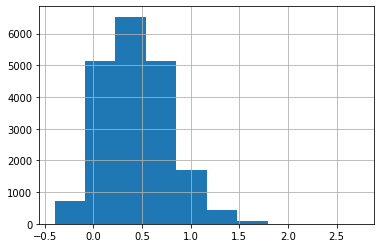

In [31]:
giants[target].hist()

<AxesSubplot:>

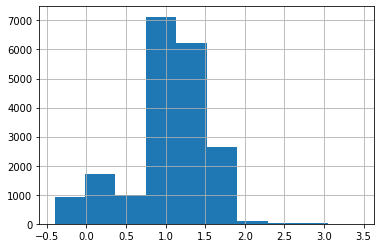

In [32]:
dwarfs[target].hist()